In [1]:
"""This is an anlysis done on Nashville housing dataset. The aim of this analysis is to predict Sale Price from Finished Area and Land Value, as the finished area can be readily estimated. """

'This is an anlysis done on Nashville housing dataset. The aim of this analysis is to predict Sale Price from Finished Area and Land Value, as the finished area can be readily estimated. '

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [3]:
#Reading dataset into a dataframe with pandas
data = pd.read_csv("C:/Users/HP/Downloads/archive (3)/Nashville_housing_data_2013_2016.csv")

In [4]:
data.head()

,Unnamed: 0.1,Unnamed: 0,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,2013-01-24,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,2013-01-11,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,2013-01-18,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,2013-01-18,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,2013-01-23,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [5]:
data.info

<bound method DataFrame.info of        Unnamed: 0.1  Unnamed: 0         Parcel ID           Land Use  \
0                 0           0  105 03 0D 008.00  RESIDENTIAL CONDO   
1                 1           1   105 11 0 080.00      SINGLE FAMILY   
2                 2           2   118 03 0 130.00      SINGLE FAMILY   
3                 3           3   119 01 0 479.00      SINGLE FAMILY   
4                 4           4   119 05 0 186.00      SINGLE FAMILY   
...             ...         ...               ...                ...   
56631         56631       56631  093 13 0B 274.00  RESIDENTIAL CONDO   
56632         56632       56632  093 13 0D 044.00  RESIDENTIAL CONDO   
56633         56633       56633  093 13 0D 048.00  RESIDENTIAL CONDO   
56634         56634       56634  093 13 0D 056.00  RESIDENTIAL CONDO   
56635         56635       56635  093 13 0D 094.00  RESIDENTIAL CONDO   

        Property Address Suite/ Condo   # Property City   Sale Date  \
0        1208  3RD AVE S        

In [6]:
print(data.dtypes)

Unnamed: 0.1                           int64
Unnamed: 0                             int64
Parcel ID                             object
Land Use                              object
Property Address                      object
Suite/ Condo   #                      object
Property City                         object
Sale Date                             object
Sale Price                             int64
Legal Reference                       object
Sold As Vacant                        object
Multiple Parcels Involved in Sale     object
Owner Name                            object
Address                               object
City                                  object
State                                 object
Acreage                              float64
Tax District                          object
Neighborhood                         float64
image                                 object
Land Value                           float64
Building Value                       float64
Total Valu

In [7]:
#dropping irrelevant details and columns with consistent values
data.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "Suite/ Condo   #", "Legal Reference", "Owner Name", "Property City", "Sold As Vacant", "Property Address"], inplace = True)

In [8]:
data.head()

,Parcel ID,Land Use,Sale Date,Sale Price,Multiple Parcels Involved in Sale,Address,City,State,Acreage,Tax District,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,105 03 0D 008.00,RESIDENTIAL CONDO,2013-01-24,132000,No,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,105 11 0 080.00,SINGLE FAMILY,2013-01-11,191500,No,1802 STEWART PL,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,118 03 0 130.00,SINGLE FAMILY,2013-01-18,202000,No,2761 ROSEDALE PL,NASHVILLE,TN,0.11,CITY OF BERRY HILL,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,119 01 0 479.00,SINGLE FAMILY,2013-01-18,32000,No,224 PEACHTREE ST,NASHVILLE,TN,0.17,URBAN SERVICES DISTRICT,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,119 05 0 186.00,SINGLE FAMILY,2013-01-23,102000,No,316 LUTIE ST,NASHVILLE,TN,0.34,URBAN SERVICES DISTRICT,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [9]:
#dropping more columns with irrelevant data
data.drop(columns=["Land Use", "Sale Date", "Multiple Parcels Involved in Sale", "City", "image", "Tax District", "State", "Address"], inplace =True)

In [10]:
data.head()

,Parcel ID,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,105 03 0D 008.00,132000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,105 11 0 080.00,191500,0.17,3127.0,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,118 03 0 130.00,202000,0.11,9126.0,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,119 01 0 479.00,32000,0.17,3130.0,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,119 05 0 186.00,102000,0.34,3130.0,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [11]:
#dropping nan values so it diesnt affect our predictions
data.dropna(inplace=True)

In [12]:
data.head()

,Parcel ID,Sale Price,Acreage,Neighborhood,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1,105 11 0 080.00,191500,0.17,3127.0,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,118 03 0 130.00,202000,0.11,9126.0,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,119 01 0 479.00,32000,0.17,3130.0,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,119 05 0 186.00,102000,0.34,3130.0,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,119 05 0 387.00,93736,0.17,3130.0,25000.0,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0


In [13]:
#checking for correlation with sales prices
corr = data.corr()
print(corr)

                Sale Price   Acreage  Neighborhood  Land Value  \
Sale Price        1.000000  0.286116      0.082440    0.744117   
Acreage           0.286116  1.000000      0.251745    0.324826   
Neighborhood      0.082440  0.251745      1.000000    0.187610   
Land Value        0.744117  0.324826      0.187610    1.000000   
Building Value    0.729016  0.223146      0.075628    0.616002   
Total Value       0.809676  0.287930      0.125894    0.823396   
Finished Area     0.704086  0.335279      0.171491    0.653172   
Year Built        0.037947  0.019088      0.129910   -0.015274   
Bedrooms          0.374458  0.155116      0.089605    0.347011   
Full Bath         0.550577  0.220607      0.132402    0.541830   
Half Bath         0.252372  0.054549      0.007775    0.187898   

                Building Value  Total Value  Finished Area  Year Built  \
Sale Price            0.729016     0.809676       0.704086    0.037947   
Acreage               0.223146     0.287930       0.335279 

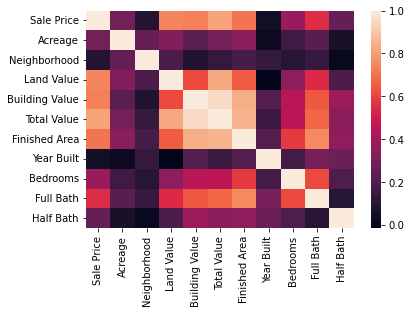

In [14]:
#Visualizing correlation
sns.heatmap(corr);

In [15]:
#dropping columns that least corrrelate with Sale Price
data.drop(columns=["Acreage", "Neighborhood", "Year Built", "Half Bath","Bedrooms"], inplace=True)

In [16]:
data.head()

,Parcel ID,Sale Price,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Exterior Wall,Grade,Full Bath
1,105 11 0 080.00,191500,32000.0,134400.0,168300.0,1149.00000,PT BSMT,BRICK,C,1.0
2,118 03 0 130.00,202000,34000.0,157800.0,191800.0,2090.82495,SLAB,BRICK/FRAME,C,2.0
3,119 01 0 479.00,32000,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,BRICK/FRAME,B,2.0
4,119 05 0 186.00,102000,25000.0,138100.0,164800.0,1969.00000,CRAWL,FRAME,C,1.0
5,119 05 0 387.00,93736,25000.0,86100.0,113300.0,1037.00000,CRAWL,FRAME,C,1.0


In [17]:
#statistical analysis on Finished Area
data.describe()["Finished Area"]

count    24013.000000
mean      1914.972588
std       1103.607669
min        450.000000
25%       1236.000000
50%       1630.000000
75%       2211.000000
max      19728.249880
Name: Finished Area, dtype: float64

In [18]:
#statistical analysis on Land Value
data.describe()["Land Value"]

count    2.401300e+04
mean     6.894307e+04
std      1.018873e+05
min      1.000000e+02
25%      2.190000e+04
50%      2.990000e+04
75%      6.030000e+04
max      1.869000e+06
Name: Land Value, dtype: float64

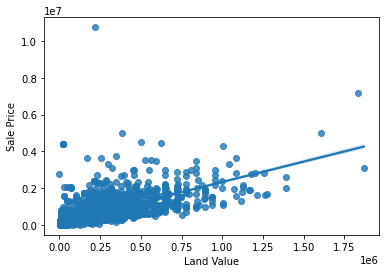

In [19]:
sns.regplot(x= "Land Value", y="Sale Price", data=data);

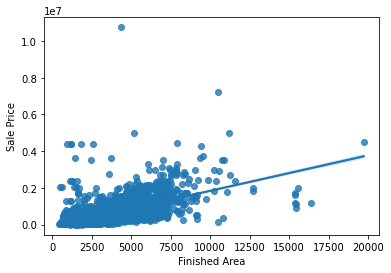

In [20]:
sns.regplot(x= "Finished Area", y="Sale Price", data=data);

In [24]:
#splitting data into test and training set, 80% of data for training and remianing 20% for test
features= ["Finished Area", "Land Value"]
X= data[features]
y= data["Sale Price"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("number of test samples:", x_test.shape)
print("number of training samples:",x_train.shape)

number of test samples: (4803, 2)
number of training samples: (19210, 2)


In [25]:
#calculating the mean of the training target
y_mean= y_train.mean()
y_mean

274656.8690265487

In [26]:
#calculating the baseline prediction
y_pred_baseline=[y_mean]*len(y_train)

In [27]:
#calculating the mean absolute error of the baseline prediction
mae_baseline=mean_absolute_error(y_train, y_pred_baseline)
print("Mean Price:", round(y_mean,2))
print("Baseline MAE:", round(mae_baseline,2))

Mean Price: 274656.87
Baseline MAE: 173142.81


In [28]:
#instantiate predictor
model= LinearRegression()

In [29]:
#fit predictor to training data
model.fit(x_train,y_train)

LinearRegression()

In [30]:
#Generating predictions
y_pred_training= model.predict(x_train)
y_pred_training[:5]

array([161676.4043294 , 151036.45519346, 168771.8475214 , 125610.57790037,
       114236.93866325])

In [31]:
#evaluating model
mae_training= mean_absolute_error(y_train, y_pred_training)
print("Training MAE:", round(mae_training,2))

Training MAE: 89327.01


In [32]:
#to test our model using the test dataset
y_pred_test= pd.Series(model.predict(x_test))
y_pred_test.head()

0    103844.468180
1    105349.489419
2    123992.160155
3    156514.316576
4    482643.052818
dtype: float64

In [35]:
#Extracting intercept result
intercept=model.intercept_
print("model intercept:", intercept)

model intercept: -31087.62075867923
